In [8]:
from __future__ import annotations

# logger.addHandler(logging.FileHandler(r"C:\Users\dupontma2\Downloads\log.txt"))
from pathlib import Path

import matplotlib.pyplot as plt
from pandas.tseries import frequencies

from post_processing.dataclass.data_aplose import DataAplose
from post_processing.dataclass.detection_filters import DetectionFilters
from post_processing.dataclass.recording_period import RecordingPeriod

### Load data

In [9]:
yaml_file = Path(r"resource\OHASISBIO_yaml.yml")
data_list = DataAplose.from_yaml(file=yaml_file)
config = DetectionFilters.from_yaml(file=yaml_file)

for data in data_list:
    data.lat = -49
    data.lon = 70

### Overview

In [ ]:
for data in data_list:
    data.overview()
    plt.tight_layout()
    plt.show()

### Single barplot

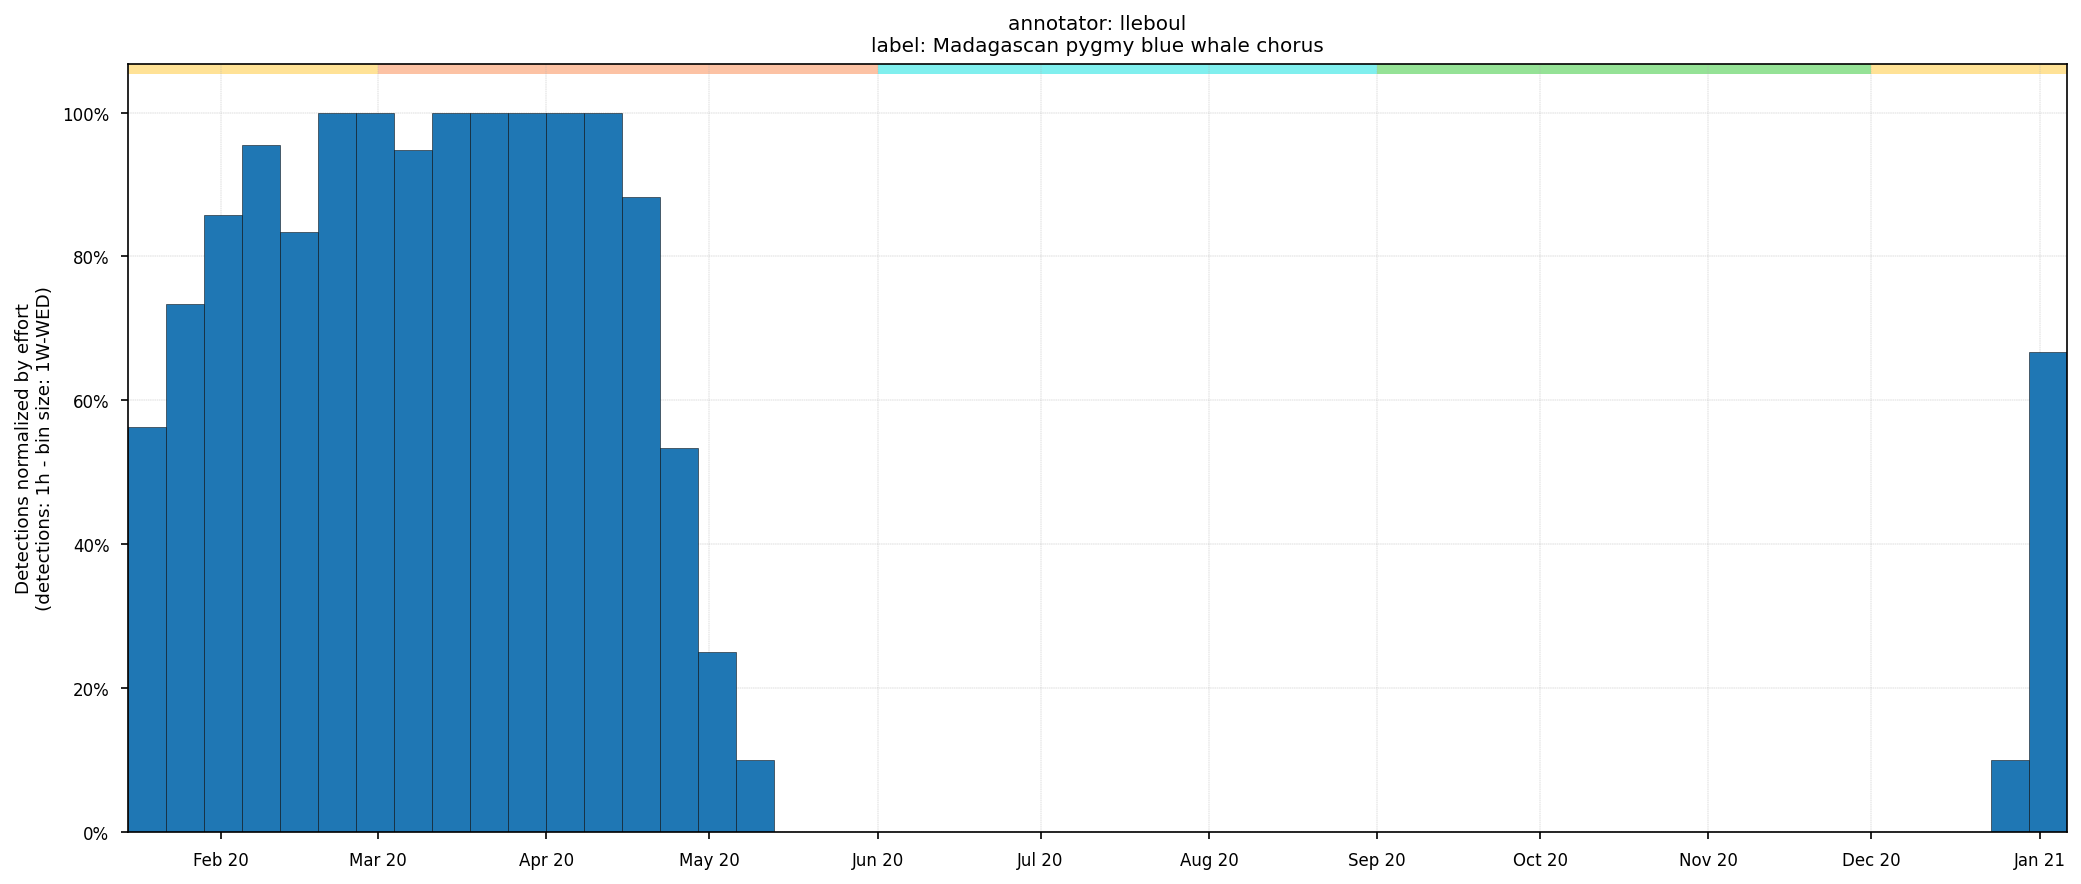

In [11]:
data = data_list[0]

fig, ax = plt.subplots(1, 1)

bin_size = frequencies.to_offset("1W-WED")
ticks = frequencies.to_offset("1MS")
fmt = "%b %y"

recording_data = RecordingPeriod.from_path(config=config,
                                           date_format="%Y_%m_%d_%H_%M_%S_%f%z",
                                           bin_size=bin_size,
                                           dataset=data.dataset
                                           )
ax = data.set_ax(ax=ax, x_ticks_res=ticks, date_format=fmt)
data.plot(
    mode="histogram",
    annotator="lleboul",
    label='Madagascan pygmy blue whale chorus',
    ax=ax,
    bin_size=bin_size,
    effort=recording_data,
    season=True,
)
plt.tight_layout()
plt.show()


### Multi-barplot

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

bin_size = frequencies.to_offset("1W-SUN")
ticks = frequencies.to_offset("1MS")
fmt = "%b %y"
for i in range(len(axs)):
    data = data_list[i]
    axs[i] = data_list[0].set_ax(ax=axs[i], x_ticks_res=ticks, date_format=fmt)
    data.plot(
        mode="histogram",
        annotator="lleboul",
        label='Madagascan pygmy blue whale chorus',
        ax=axs[i],
        bin_size=bin_size,
        season=True,
    )

plt.tight_layout()
plt.show()
